### Приближённое решение краевой задачи для обыкновенного дифференциального уравнения.
Необходимо для дифференциального уравнения найти решение краевой задачи методами:
1. Прогонки 1 порядка точности
2.  Прогонки 2 порядка точности
   
Шаг сетки $h = 0.05$, отрезок: $[0,1]$

**Краевая задача для приближённого решения** (вариант 23)

$$
\begin{cases}
u^{''}(x) - 2(tg(x))u^{'}(x) + \frac{\ 1}{\cos^{4}(x)}u(x) = \frac{\ th(x)}{\cos^{4}(x)},\\
u(0) - u^{'}(0) = 0,\\
u(1) = 1.5708,
\end{cases}
$$
Точное решение краевой задачи:\
$$
u_0(x) = \tan(x) + \cos(\tan(x))
$$

In [81]:
import numpy as np
import matplotlib.pyplot as plt

**Метод конечных разностей**

Идея метода

Замена производных в дифференциальном уравнении на **конечные разности** на равномерной сетке. Это позволяет свести дифференциальную задачу к системе линейных алгебраических уравнений (СЛАУ).

Разобьём отрезок $[a, b]$ на $N$ частей с шагом $h = \frac{b - a}{N}$:
$$
x_i = a + i h, \quad i = 0, 1, \dots, N.
$$

Обозначим приближённое решение в узле $x_i$ как $u_i \approx u(x_i)$.

Аппроксимация производных:
- Первая производная (центральная разность, 2-й порядок):
  $$
  u'(x_i) \approx \frac{u_{i+1} - u_{i-1}}{2h}
  $$
- Вторая производная (центральная разность, 2-й порядок):
  $$
  u''(x_i) \approx \frac{u_{i-1} - 2u_i + u_{i+1}}{h^2}
  $$

Подставляя в уравнение, получаем разностную схему в каждом внутреннем узле $i = 1, 2, \dots, N-1$:
$$
\frac{u_{i-1} - 2u_i + u_{i+1}}{h^2} + p_i \frac{u_{i+1} - u_{i-1}}{2h} + q_i u_i = f_i
$$

После умножения на $h^2$ и группировки:
$$
a_i u_{i-1} + b_i u_i + c_i u_{i+1} = d_i,
$$
где
$$
a_i = 1 - \frac{h}{2} p_i, \quad
b_i = -2 + h^2 q_i, \quad
c_i = 1 + \frac{h}{2} p_i, \quad
d_i = h^2 f_i.
$$

Краевые условия аппроксимируются отдельно с нужным порядком точности.

**Метод прогонки**

Идея метода

Эффективный алгоритм решения **трёхдиагональных систем линейных уравнений**, возникающих в методе конечных разностей. Имеет сложность $O(N)$, в отличие от $O(N^3)$ у обычного метода Гаусса.

Общий вид системы:
$$
\begin{cases}
b_0 u_0 + c_0 u_1 = d_0, & \text{(краевое условие слева)} \\
a_i u_{i-1} + b_i u_i + c_i u_{i+1} = d_i, & i = 1, 2, \dots, N-1 \\
a_N u_{N-1} + b_N u_N = d_N, & \text{(краевое условие справа)}
\end{cases}
$$

Алгоритм (прямая и обратная прогонка):

1. **Прямой ход** — вычисление прогоночных коэффициентов:
   $$
   \alpha_1 = -\frac{c_0}{b_0}, \quad \beta_1 = \frac{d_0}{b_0}
   $$
   Для $i = 1$ до $N-1$:
   $$
   \alpha_{i+1} = -\frac{c_i}{a_i \alpha_i + b_i}, \quad
   \beta_{i+1} = \frac{d_i - a_i \beta_i}{a_i \alpha_i + b_i}
   $$

2. **Обратный ход** — вычисление решения:
   $$
   u_N = \frac{d_N - a_N \beta_N}{a_N \alpha_N + b_N}, \quad \text{(если условие справа не фиксировано)}
   $$
   В случае $u_N = \text{const}$ — сразу известно.
   Затем:
   $$
   u_i = \alpha_{i+1} u_{i+1} + \beta_{i+1}, \quad i = N-1, N-2, \dots, 0
   $$

Свойства метода:
- Применим только к **трёхдиагональным** системам.
- Требует выполнения условия устойчивости (диагональное преобладание).
- Очень эффективен для краевых задач на равномерной сетке.


#### Краевые условия

In [82]:
a, b = 0, 1
h = 0.05
N = int((b - a) / h)
x = np.linspace(a, b, N + 1)

#### Точное решение

In [84]:
def u_exact(x):
    return np.tan(x) + np.cos(np.tan(x))

In [85]:
def u_exact_deriv(x):
    return 1/np.cos(x)**2 - np.sin(np.tan(x))/np.cos(x)**2

In [86]:
def u_exact_second_deriv(x):
    term1 = 2*np.sin(x)/np.cos(x)**3
    term2 = -2*np.sin(x)*np.sin(np.tan(x))/np.cos(x)**3 - np.cos(np.tan(x))/(np.cos(x)**4)
    return term1 + term2

In [87]:
def p(x):
    return -2 * np.tan(x)

def q(x):
    return 1 / (np.cos(x)**4)

def f(x):
    # вычисляем f(x) из уравнения: u'' + p(x)u' + q(x)u = f(x)
    # используя точное решение
    return u_exact_second_deriv(x) + p(x)*u_exact_deriv(x) + q(x)*u_exact(x)

In [88]:
# вычисляем значения функций в узлах
p_vals = p(x)
q_vals = q(x)
f_vals = f(x)

# правая часть в разностной схеме
d_base = h**2 * f_vals

# граничные условия из точного решения
u_a_exact = u_exact(a)  # 1.0
u_b_exact = u_exact(b)  # 1.57

u_a_condition = 0  # u(0) - u'(0) = 0
u_b_value = u_b_exact  # используем точное значение в правой границе

u1 = np.zeros(N + 1)
u2 = np.zeros(N + 1)

# устанавливаем правое граничное условие
u1[N] = u_b_value
u2[N] = u_b_value

In [89]:
print(u_b_exact)

1.570795926803578


#### Функция метода прогонки

In [90]:
def thomas_algorithm(a, b, c, d):
    n = len(d)
    # прямая прогонка: вычисляем прогоночные коэффициенты α и β
    alpha = np.zeros(n)
    beta = np.zeros(n)
    u = np.zeros(n)

    alpha[0] = -c[0] / b[0]
    beta[0] = d[0] / b[0]

    for i in range(1, n):
        denom = b[i] + a[i] * alpha[i - 1]
        if i < n - 1:
            alpha[i] = -c[i] / denom
        beta[i] = (d[i] - a[i] * beta[i - 1]) / denom

    # обратная прогонка: находим u
    u[-1] = beta[-1]
    for i in range(n - 2, -1, -1):
        u[i] = alpha[i] * u[i + 1] + beta[i]
    return u

In [91]:
# метод прогонки для краевого условия 1го порядка
A1 = np.zeros((N + 1, N + 1))
rhs1 = np.zeros(N + 1)

A1[0, 0] = 1 + 1/h
A1[0, 1] = -1/h
rhs1[0] = 0

# Внутренние узлы i = 1 до N-1
for i in range(1, N):
    A1[i, i - 1] = 1 - (h / 2) * p_vals[i]
    A1[i, i]     = -2 + h**2 * q_vals[i] 
    A1[i, i + 1] = 1 + (h / 2) * p_vals[i]
    rhs1[i] = d_base[i]

# Правое условие
A1[N, N] = 1
rhs1[N] = u_b_value

a1 = np.zeros(N + 1)
b1 = np.zeros(N + 1)
c1 = np.zeros(N + 1)
# d1 = rhs1.copy()

for i in range(N + 1):
    b1[i] = A1[i, i]
    if i > 0:
        a1[i] = A1[i, i - 1]
    if i < N:
        c1[i] = A1[i, i + 1]

u1 = thomas_algorithm(a1, b1, c1, rhs1)

In [92]:
u_exact_vals = u_exact(x)
error1 = np.abs(u1 - u_exact_vals)
error2 = np.abs(u2 - u_exact_vals)

# максимальные ошибки
max_error1 = np.max(error1)
max_error2 = np.max(error2)

print(f"Максимальная ошибка (1-й порядок): {max_error1:.2e}")
print(f"Максимальная ошибка (2-й порядок): {max_error2:.2e}")

Максимальная ошибка (1-й порядок): 2.34e-02
Максимальная ошибка (2-й порядок): 1.57e+00


In [93]:
# метод прогонки для краевого условия 2-го порядка

A2 = np.zeros((N + 1, N + 1), dtype=float)
rhs2 = np.zeros(N + 1, dtype=float)

B0 = 1 + 3/(2*h)
C0 = -4/(2*h)
D0 = 1/(2*h)
r0 = 0

A2[0, 0] = B0
A2[0, 1] = C0
A2[0, 2] = D0
rhs2[0] = r0

for i in range(1, N):
    a_i = 1 - (h / 2) * p_vals[i]
    b_i = -2 + h**2 * q_vals[i]
    c_i = 1 + (h / 2) * p_vals[i]
    A2[i, i - 1] = 1 - (h / 2) * p_vals[i]
    A2[i, i] = -2 + h**2 * q_vals[i]
    A2[i, i + 1] = 1 + (h / 2) * p_vals[i]
    rhs2[i] = d_base[i]

# Правое граничное условие
A2[N, N] = 1.0
rhs2[N] = u_b_value

# Элиминация u2 из первой строки через строку i=1
a1_val = A2[1, 0]
b1_val = A2[1, 1]
c1_val = A2[1, 2]
d1_val = rhs2[1]

# Модифицированные коэффициенты первой строки
B0_mod = B0 - D0 * (a1_val / c1_val)
C0_mod = C0 - D0 * (b1_val / c1_val)
r0_mod = r0 - D0 * (d1_val / c1_val)

# Подставляем модифицированные значения в A2/rhs2
A2[0, 0] = B0_mod
A2[0, 1] = C0_mod
A2[0, 2] = 0.0
rhs2[0]  = r0_mod

# Теперь A2 трехдиагональна: извлекаем диагонали и решаем Томасом
a2 = np.zeros(N + 1, dtype=float)  # subdiag 1
b2 = np.zeros(N + 1, dtype=float)  # diag
c2 = np.zeros(N + 1, dtype=float)  # supdiag 2
d2 = rhs2.copy()

for i in range(N + 1):
    b2[i] = A2[i, i]
    if i > 0:
        a2[i] = A2[i, i - 1]
    if i < N:
        c2[i] = A2[i, i + 1]

u2 = thomas_algorithm(a2, b2, c2, d2)

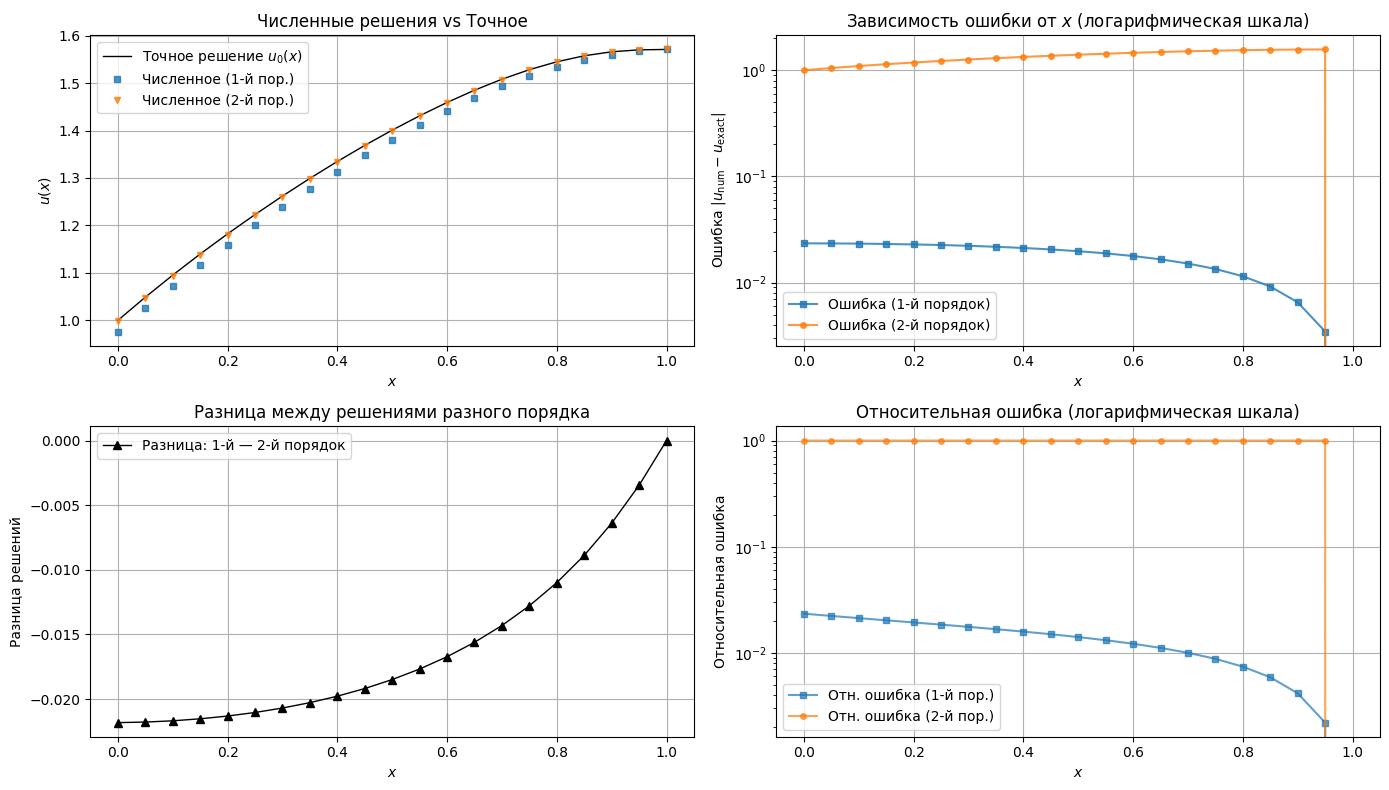

In [96]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(x, u_exact_vals, 'k-', lw=1, label='Точное решение $u_0(x)$')
plt.plot(x, u1, 's', ms=4, alpha=0.8, label=f'Численное (1-й пор.)')
plt.plot(x, u2, 'v',  ms=4, alpha=0.8, label=f'Численное (2-й пор.)')
plt.xlabel('$x$')
plt.ylabel('$u(x)$')
plt.title('Численные решения vs Точное')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.semilogy(x, error1, 's-', ms=4, label=f'Ошибка (1-й порядок)', alpha=0.8)
plt.semilogy(x, error2, 'o-', ms=4, label=f'Ошибка (2-й порядок)', alpha=0.8)
plt.xlabel('$x$')
plt.ylabel('Ошибка $|u_{\\text{num}} - u_{\\text{exact}}|$')
plt.title('Зависимость ошибки от $x$ (логарифмическая шкала)')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(x, u1 - u2, '^-', lw = 1, color='k', label='Разница: 1-й — 2-й порядок')
plt.xlabel('$x$')
plt.ylabel('Разница решений')
plt.title('Разница между решениями разного порядка')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
rel_error1 = error1 / (np.abs(u_exact_vals) + 1e-15)
rel_error2 = error2 / (np.abs(u_exact_vals) + 1e-15)
plt.semilogy(x, rel_error1, 's-', ms=4, alpha=0.7, label='Отн. ошибка (1-й пор.)')
plt.semilogy(x, rel_error2, 'o-', ms=4, alpha=0.7, label='Отн. ошибка (2-й пор.)')
plt.xlabel('$x$')
plt.ylabel('Относительная ошибка')
plt.title('Относительная ошибка (логарифмическая шкала)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig(fname = 'график метода прогонки')
plt.show()

#### Исследование сходимости методов

In [97]:
h_values = [0.1, 0.05, 0.025, 0.0125, 0.00625]
errors_1st = []  # ошибка для 1-го порядка
errors_2nd = []  # ошибка для 2-го порядка

for h in h_values:
    N = int((b - a) / h)
    x = np.linspace(a, b, N + 1)

    # вычисляем коэффициенты
    p_vals = p(x)
    q_vals = q(x)
    f_vals = f(x)
    d_base = h**2 * f_vals
    u_b_value = u_exact(b)  # используем точное значение для граничного условия

    # 1-й порядок на левой границе
    A1 = np.zeros((N + 1, N + 1))
    rhs1 = np.zeros(N + 1)

    # левое условие
    A1[0, 0] = 1 + 1 / h
    A1[0, 1] = -1 / h
    rhs1[0] = 0

    # внутренние узлы i = 1 до N-1
    for i in range(1, N):
        A1[i, i - 1] = 1 - (h / 2) * p_vals[i]
        A1[i, i]     = -2 + h**2 * q_vals[i]
        A1[i, i + 1] = 1 + (h / 2) * p_vals[i]
        rhs1[i] = d_base[i]

    # правое условие
    A1[N, N] = 1
    rhs1[N] = u_b_value

    a1 = np.zeros(N + 1)
    b1 = np.zeros(N + 1)
    c1 = np.zeros(N + 1)
    d1 = rhs1.copy()

    for i in range(N + 1):
        b1[i] = A1[i, i]
        if i > 0:
            a1[i] = A1[i, i - 1]
        if i < N:
            c1[i] = A1[i, i + 1]

    u1 = thomas_algorithm(a1, b1, c1, d1)

    # 2-й порядок на левой границе
    A2 = np.zeros((N + 1, N + 1))
    rhs2 = np.zeros(N + 1)

    # u0 - (-3u0 + 4u1 - u2)/(2h) = -1 → (3 + 2h)u0 - 4u1 + u2 = -2h
    A2[0, 0] = 1 + 3/(2*h)
    A2[0, 1] = -2/h
    if N >= 2:
        A2[0, 2] = 1/(2*h)
    rhs2[0] = 0

    for i in range(1, N):
        A2[i, i-1] = 1 - (h / 2) * p_vals[i]
        A2[i, i]   = -2 + h**2 * q_vals[i]
        A2[i, i+1] = 1 + (h / 2) * p_vals[i]
        rhs2[i] = d_base[i]

    A2[N, N] = 1
    rhs2[N] = u_b_value

    u2 = np.linalg.solve(A2, rhs2)
    u_ex = u_exact(x)

    # Максимальная ошибка
    err1 = np.max(np.abs(u1 - u_ex))
    err2 = np.max(np.abs(u2 - u_ex))

    errors_1st.append(err1)
    errors_2nd.append(err2)

# Преобразуем в массивы
h_vals = np.array(h_values)
err_1 = np.array(errors_1st)
err_2 = np.array(errors_2nd)

# Оценка порядка точности через МНК (наклон в логарифмических координатах)
log_h = np.log(h_vals)
log_e1 = np.log(err_1)
log_e2 = np.log(err_2)

p1 = np.polyfit(log_h, log_e1, 1)[0]  # наклон ≈ порядок точности
p2 = np.polyfit(log_h, log_e2, 1)[0]

print("Оценка порядка точности:")
print(f"Краевое условие 1-го порядка: p ≈ {p1:.3f}")
print(f"Краевое условие 2-го порядка: p ≈ {p2:.3f}")

Оценка порядка точности:
Краевое условие 1-го порядка: p ≈ 0.966
Краевое условие 2-го порядка: p ≈ 1.929


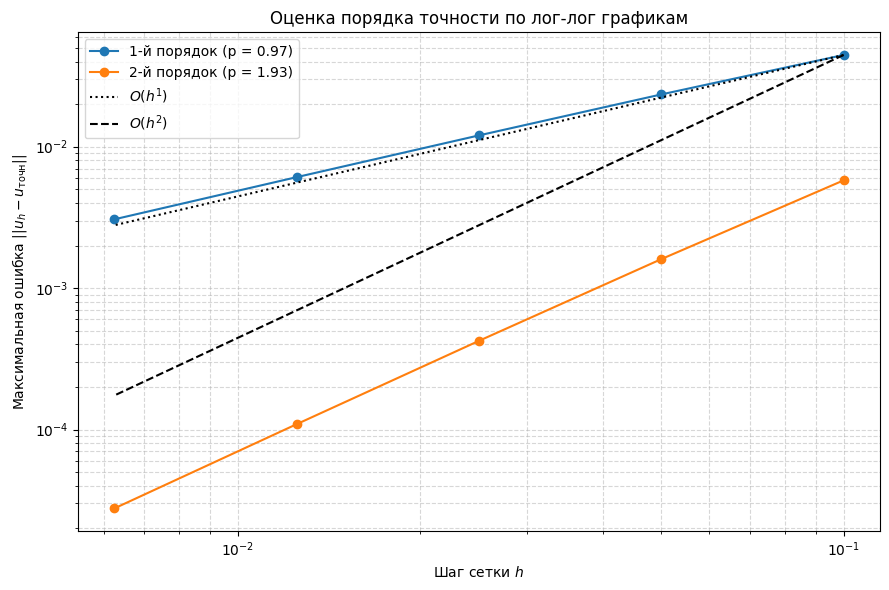

In [100]:
plt.figure(figsize=(9, 6))
plt.loglog(h_vals, err_1, 'o-', label=f'1-й порядок (p = {p1:.2f})', markersize=6)
plt.loglog(h_vals, err_2, 'o-', label=f'2-й порядок (p = {p2:.2f})', markersize=6)

h_ref = np.array(h_values)
plt.loglog(h_ref, err_1[0] * (h_ref/h_ref[0])**1, 'k:', label=r'$O(h^1)$')
plt.loglog(h_ref, err_1[0] * (h_ref/h_ref[0])**2, 'k--', label=r'$O(h^2)$')

plt.xlabel('Шаг сетки $h$')
plt.ylabel('Максимальная ошибка $||u_h - u_{\\text{точн}}||$')
plt.title('Оценка порядка точности по лог-лог графикам')
plt.legend()
plt.grid(True, which="both", linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()